In [1]:
# ipcluster start -n 12 --engines=MPIEngineSetLauncher
import ipyparallel as ipp
client = ipp.Client(profile="default")
%autopx

%autopx enabled


/home/diego/Myopt/Miniconda/miniconda3/envs/UIBCDFLab_dev/lib/python3.6/site-packages/ipyparallel/client/client.py:459: RuntimeWarning: 
            Controller appears to be listening on localhost, but not on this machine.
            If this is true, you should specify Client(...,sshserver='you@nauta')
            or instruct your controller to listen on an external IP.
  RuntimeWarning)


In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import sys
sys.path.append('/home/diego/Projects/Pynterpred_devel/')
import time
import pynterpred as pnt
import numpy as np
from matplotlib import pyplot as plt
import dill as pickle

In [4]:
from mpi4py import MPI
comm = MPI.COMM_WORLD

In [5]:
Receptor    = '/home/diego/Projects/Pynterpred_devel/pynterpred/testsystems/Barnase-Barstar/pdbs/Barnase.pdb'
Ligand      = '/home/diego/Projects/Pynterpred_devel/pynterpred/testsystems/Barnase-Barstar/pdbs/Barstar.pdb'

#Receptor    = '/home/diego/Projects/Pynterpred_devel/pynterpred/testsystems/E9034A_ETEC/pdbs/longus_E9034A_ETEC.pdb'
#Ligand      = '/home/diego/Projects/Pynterpred_devel/pynterpred/testsystems/E9034A_ETEC/pdbs/longus_E9034A_ETEC.pdb'

#Receptor    = '/home/diego/Projects/Pynterpred_devel/pynterpred/testsystems/Fab_5C8/pdbs/Fab_5C8_A.pdb'
#Ligand      = '/home/diego/Projects/Pynterpred_devel/pynterpred/testsystems/Fab_5C8/pdbs/Fab_5C8_B.pdb'

#Receptor    = '/home/diego/Projects/Pynterpred_devel/pynterpred/testsystems/hGH/pdbs/hGH_A.pdb'
#Ligand      = '/home/diego/Projects/Pynterpred_devel/pynterpred/testsystems/hGH/pdbs/hGH_B.pdb'

force_field = 'amber14-all.xml'
pH          = 7.0

In [6]:
docker = pnt.predict(Receptor, Ligand, force_field, pH, delta_x = 0.5, nside = 5, 
                     mpi_comm = comm, verbose = True)

[stdout:0] 
Setting up the mechanical molecular context... 7.32 secs
Setting up the evaluation region... 8.1 secs
Evaluation of 462000 different relative orientations started...
In mpi rank 0 centers from 0 to 128 in 327.84 seconds ( 0.39  its/sec)
Time to collect potential energies: 0.024862
... done in 334.99 secs
--- FINISHED ---
Complex at infinite distance with Potential Energy: 7606.5654296875 kJ/mol
Best relative orientation with Potential Energy: 5564.8740234375 kJ/mol
[stdout:1] In mpi rank 1 centers from 129 to 257 in 332.67 seconds ( 0.38  its/sec)
[stdout:2] In mpi rank 2 centers from 258 to 386 in 327.67 seconds ( 0.39  its/sec)
[stdout:3] In mpi rank 3 centers from 387 to 515 in 330.5 seconds ( 0.39  its/sec)
[stdout:4] In mpi rank 4 centers from 516 to 643 in 331.73 seconds ( 0.38  its/sec)
[stdout:5] In mpi rank 5 centers from 644 to 771 in 332.1 seconds ( 0.38  its/sec)
[stdout:6] In mpi rank 6 centers from 772 to 899 in 326.34 seconds ( 0.39  its/sec)
[stdout:7] In mp

In [7]:
if comm.Get_rank() == 0:
    docker.save('docker_5_5.dpkl')

In [8]:
del(docker)

In [9]:
if comm.Get_rank() == 0:
    docker_loaded = pnt.load('docker_5_5.dpkl')
    xx, pes = docker_loaded.get_potential_energy_1D_landscape()
    pe_uncoupled = docker_loaded.potential_energy_uncoupled 

[output:0]

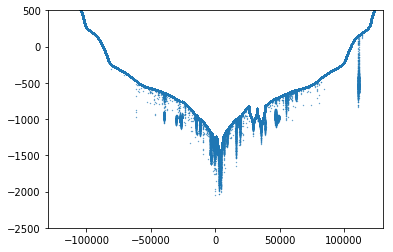

In [22]:
if comm.Get_rank() == 0:
    plt.scatter(xx, (pes-pe_uncoupled)._value, 0.1)
    plt.xlim([-130000,130000])
    plt.ylim([-2500,500])